In [26]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocessing
from sklearn.preprocessing import LabelEncoder

# Scaling and Splitting
from sklearn.preprocessing import StandardScaler,scale

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

#Unbalance problems
from imblearn.over_sampling import SMOTE

# Evaluation
from sklearn.metrics import f1_score,accuracy_score, precision_score,recall_score
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix, roc_curve,roc_auc_score

import warnings 
# warnings.filterwarnings(action='ignore')
sns.set()

In [27]:
preparedDFs = os.listdir('Dataset')
preparedDFs

['weatherAUS.csv',
 'weatherAUS_prepared.csv',
 'weatherAUS_prepared30.csv',
 'weatherAUS_prepared_lowCorr.csv',
 'weatherAUS_prepared_lowCorr30.csv']

In [28]:
weatherAus = pd.read_csv(os.path.join('Dataset',preparedDFs[-1]))
weatherAus

,Location,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Cloud9am,Cloud3pm,Temp3pm,Month,RainTomorrow
0,9,0.0,1.400000,8.3,6.0,37.0,8.0,3.0,13.0,19.0,82.0,42.0,1031.2,1.0,3.0,16.6,6,0
1,1,0.0,10.600000,11.3,8.0,48.0,10.0,2.0,4.0,22.0,22.0,13.0,1019.1,0.0,0.0,34.3,4,0
2,26,0.0,6.400000,10.8,3.0,31.0,2.0,3.0,17.0,11.0,83.0,39.0,1022.7,4.5,4.5,26.2,12,0
3,5,0.0,6.922464,7.2,9.0,50.0,13.0,9.0,20.0,31.0,68.0,66.0,1013.0,3.0,8.0,23.3,3,0
4,9,0.0,3.000000,9.8,1.0,37.0,1.0,7.0,20.0,9.0,56.0,20.0,1025.4,1.0,0.0,23.8,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16527,10,0.0,1.400000,6.2,3.0,44.0,3.0,0.0,19.0,15.0,73.0,48.0,1022.7,3.0,6.0,18.5,3,1
16528,9,1.0,2.600000,6.2,15.0,61.0,14.0,15.0,20.0,28.0,68.0,84.0,1014.2,5.0,6.0,15.5,9,1
16529,25,0.0,5.200000,8.0,15.0,46.0,9.0,15.0,22.0,31.0,46.0,58.0,1021.3,1.0,4.0,17.9,9,1
16530,22,0.0,3.600000,8.9,15.0,35.0,15.0,5.0,26.0,15.0,61.0,50.0,1022.2,5.0,2.0,19.2,5,1


# Unbalance problems

Text(0.5, 1.0, '30% Subsample')

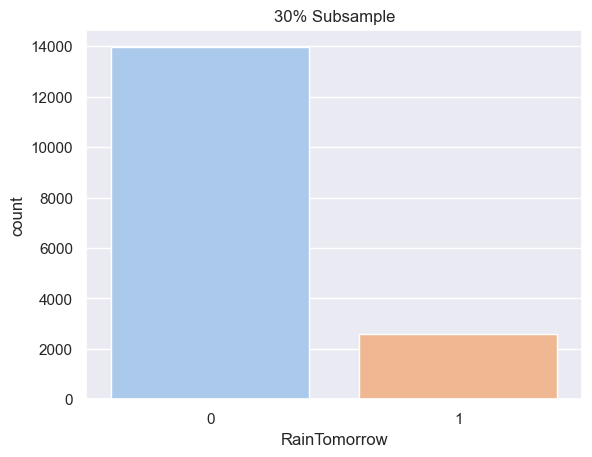

In [29]:
X = weatherAus.drop('RainTomorrow',axis=1)
y = weatherAus['RainTomorrow']
ax = sns.countplot(x=y, palette='pastel')
plt.title('30% Subsample')

### SMOTE Oversampling

In [30]:
Xstdard = StandardScaler().fit_transform(X)
Xstdard = pd.DataFrame(Xstdard, columns=X.columns)

In [31]:
smote = SMOTE()

In [33]:
Xtrain, Xtest, ytrain, ytest = train_test_split(Xstdard, y, test_size=0.2, random_state=13)
Xtrain_smote, ytrain_smote = smote.fit_resample(Xtrain, ytrain)
Xtrain_smote

,Location,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Cloud9am,Cloud3pm,Temp3pm,Month
0,1.384791,-0.397330,-0.912660,-0.904483,-0.863889,-0.271716,0.111365,-0.207881,-1.852753,-0.184989,1.745502,1.620352,1.127094,0.186053,0.164361,-1.842973,0.770787
1,0.416021,-0.397330,-1.046679,-1.210045,0.919875,2.108979,0.870982,0.674595,1.410236,0.744255,-0.087721,0.481699,-0.937276,0.752053,0.769441,-1.357571,-0.104015
2,-1.763711,-0.397330,-0.443591,-0.293358,-0.863889,0.521849,-0.865284,-0.207881,0.866404,1.009754,0.917595,-0.277403,1.492329,-1.134613,-1.247492,-1.420204,-0.104015
3,-0.068364,1.120674,-0.778640,-2.210067,0.473934,2.505761,1.305049,1.336452,2.361941,2.204497,0.503642,1.295022,-1.540707,1.506720,1.172827,-1.435862,0.479187
4,-1.521518,-0.397330,0.896604,0.651107,0.027993,-0.966085,0.219882,-0.428500,-0.629132,-0.184989,0.385369,-0.765398,0.523663,-1.511947,-1.650879,0.223899,-0.978816
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22359,0.820050,1.626675,-0.957748,-0.932151,0.176541,1.182582,0.292034,0.233357,0.457989,1.893985,-0.678847,0.147320,1.127157,0.814525,0.298734,-1.696928,0.381857
22360,1.355307,1.476196,-0.506988,-0.107171,1.052493,2.039283,1.000068,0.143957,2.130458,1.773929,0.121672,0.651718,-0.581874,0.996827,1.031115,-1.549307,-0.048741
22361,-0.599063,1.626675,-0.986607,-2.265624,-0.365533,-0.716707,0.219882,-0.376638,-0.849049,-1.410939,1.312461,2.054124,0.621340,1.506720,1.576214,-1.876101,0.367661
22362,0.523381,-0.339932,-0.710229,-1.930540,-1.259245,-0.548872,1.329668,0.574492,-0.978160,-0.039957,0.249446,0.469397,-0.296681,1.129387,1.530456,-0.500909,1.095465


# Logistic Regression

In [109]:
 from sklearn.linear_model import LogisticRegression
    # ?LogisticRegression

In [110]:
logres = LogisticRegression()
logres.fit(Xtrain_smote, ytrain_smote)

logres_unbal = LogisticRegression()
logres_unbal.fit(Xtrain, ytrain)

LogisticRegression()

In [111]:
ypred = logres.predict(Xtest)
ypred_unbal = logres_unbal.predict(Xtest)

In [112]:
report = classification_report(ytest, ypred)
f1score = f1_score(ytest,ypred)
precision = precision_score(ytest, ypred)
recall = recall_score(ytest,ypred)
accuracy = accuracy_score(ytest,ypred)

print(report)
print(f'f1: {f1score}')
print(f'precision: {precision}')
print(f'recall: {recall}')


              precision    recall  f1-score   support

           0       0.95      0.78      0.86      2780
           1       0.41      0.80      0.55       527

    accuracy                           0.79      3307
   macro avg       0.68      0.79      0.70      3307
weighted avg       0.87      0.79      0.81      3307

f1: 0.5453376205787781
precision: 0.41245136186770426
recall: 0.8045540796963947


In [113]:
report = classification_report(ytest, ypred_unbal)
f1score = f1_score(ytest,ypred_unbal)
precision = precision_score(ytest, ypred_unbal)
recall = recall_score(ytest,ypred_unbal)
accuracy = accuracy_score(ytest,ypred_unbal)

print(report)
print(f'f1: {f1score}')
print(f'precision: {precision}')
print(f'recall: {recall}')
print(f'accuracy: {accuracy}')

              precision    recall  f1-score   support

           0       0.89      0.97      0.93      2780
           1       0.67      0.35      0.46       527

    accuracy                           0.87      3307
   macro avg       0.78      0.66      0.69      3307
weighted avg       0.85      0.87      0.85      3307

f1: 0.4626865671641791
precision: 0.6714801444043321
recall: 0.35294117647058826
accuracy: 0.8693680072573329


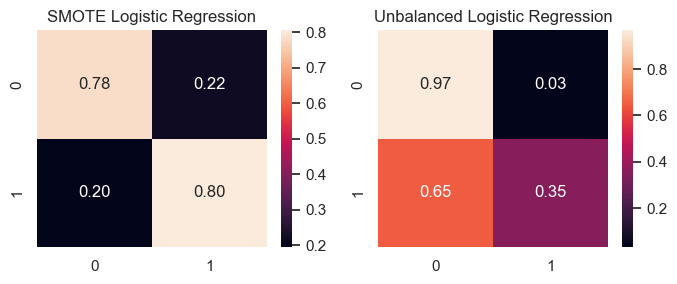

In [114]:
fig, axes = plt.subplots(1, 2, figsize=(7, 3))
sns.heatmap(confusion_matrix(ytest,ypred, normalize='true'), annot=True, fmt='.2f', ax=axes[0])
axes[0].set_title('SMOTE Logistic Regression')
sns.heatmap(confusion_matrix(ytest,ypred_unbal, normalize='true'), annot=True, fmt='.2f',ax=axes[1])
axes[1].set_title('Unbalanced Logistic Regression')
plt.tight_layout()

In [115]:
coefs = list(logres.coef_)
coefs_unbal = list(logres_unbal.coef_)
len(coefs)
scores = pd.DataFrame({'col':Xtrain_smote.columns, 'coefs':coefs[0], 'coefs unbalanced': coefs_unbal[0]}).sort_values(by='coefs',ascending=False)
scores

,col,coefs,coefs unbalanced
11,Humidity3pm,0.943359,0.949494
5,WindGustSpeed,0.591964,0.611148
14,Cloud3pm,0.393795,0.323045
15,Temp3pm,0.345706,0.314801
16,Month,0.143400,0.100502
7,WindDir3pm,0.123551,0.129176
4,WindGustDir,0.092573,0.072361
0,Location,0.012283,-0.050097
6,WindDir9am,-0.012068,-0.004934
1,Rainfall,-0.026079,0.056915
